In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
%matplotlib inline
import os
import IPython.display as ipd
import numpy as np

In [2]:
os.getcwd()

'/Users/rakesh.rai/code/whistles'

In [3]:
fileName = os.getcwd() + '/full_tracks/pressure-cooker-5431124yes.wav'

In [4]:
fileName

'/Users/rakesh.rai/code/whistles/full_tracks/pressure-cooker-5431124yes.wav'

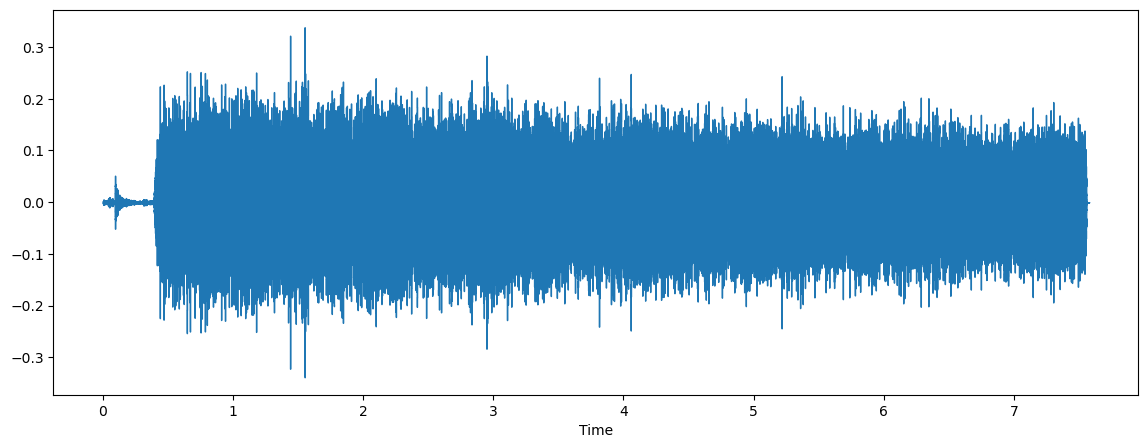

In [5]:
plt.figure(figsize=(14,5));
data, sample_rate = librosa.load(fileName)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(fileName)

In [6]:
sample_rate

22050

In [7]:
data

array([ 2.3745434e-04,  3.7005814e-04,  4.1185488e-04, ...,
       -7.5851087e-10, -5.0655147e-10,  1.5196591e-09], dtype=float32)

In [8]:
import pandas as pd
metadata = pd.read_csv(os.getcwd() + '/UrbanSound8K/metadata/UrbanSound8K.csv');
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [9]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [10]:
#####extract feature
data, sample_rate = librosa.load(fileName)
mfcc = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
mfcc.shape

(40, 327)

In [11]:
mfcc

array([[-5.2767444e+02, -4.7681870e+02, -4.5805820e+02, ...,
        -1.7734528e+02, -2.0792236e+02, -3.1087613e+02],
       [ 9.2074753e+01,  9.0954361e+01,  9.2585396e+01, ...,
        -6.8670670e+01, -7.5686066e+01, -8.2100220e+01],
       [ 9.8922014e+00,  5.9102736e+00,  3.2781384e+00, ...,
        -1.4575573e+01, -1.2786814e+01, -8.7604361e+00],
       ...,
       [ 8.5225165e-01,  2.5577757e+00,  2.3604934e+00, ...,
         7.8884201e+00,  2.9833245e+00, -2.2049363e+00],
       [-1.5205609e+00,  2.0282910e+00,  1.8296788e+00, ...,
        -6.9830709e+00, -4.6979837e+00, -1.6318117e+00],
       [ 2.3425674e-01, -2.5242954e-01,  3.1603200e+00, ...,
         5.4758458e+00,  6.5573511e+00,  9.9577122e+00]], dtype=float32)

In [12]:
metadata = pd.read_csv(os.getcwd() + '/UrbanSound8K/metadata/UrbanSound8K.csv');
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [14]:
data = features_extractor(os.getcwd() + '/UrbanSound8K/audio/fold1/7061-6-0-0.wav')

In [15]:
audio_dataset_path = os.getcwd() + "/UrbanSound8K/audio/"

import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
cls_dict = {} 
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    cls_dict[row["classID"]] = final_class_labels
    extracted_features.append([data,final_class_labels])

3553it [02:23, 24.05it/s]/Users/rakesh.rai/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [05:28, 34.31it/s]/Users/rakesh.rai/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/rakesh.rai/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [05:42, 25.46it/s]


In [16]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [17]:
cls_dict

{3: 'dog_bark',
 2: 'children_playing',
 1: 'car_horn',
 0: 'air_conditioner',
 9: 'street_music',
 6: 'gun_shot',
 8: 'siren',
 5: 'engine_idling',
 7: 'jackhammer',
 4: 'drilling'}

In [18]:
## split data into independent & dependent datasets
X = np.array(extracted_features_df["feature"].tolist())
y = np.array(extracted_features_df["class"].tolist())

In [19]:
len(y)

8732

In [20]:
X.shape
y[0]

'dog_bark'

In [21]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [22]:
print(labelencoder.fit_transform(y))


[3 2 2 ... 1 1 1]


In [23]:
y=to_categorical(labelencoder.fit_transform(y))

In [41]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
X_train.shape

(6985, 40)

In [43]:
X_test.shape

(1747, 40)

In [44]:
y_train.shape

(6985, 10)

In [45]:
y_test.shape

(1747, 10)

In [46]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [48]:

### No of classes
num_labels=y.shape[1]

In [49]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [51]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [52]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
212/219 [============================>.] - ETA: 0s - loss: 12.9363 - accuracy: 0.1119
Epoch 1: val_loss improved from inf to 2.29065, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 12.6557 - accuracy: 0.1122 - val_loss: 2.2907 - val_accuracy: 0.1185
Epoch 2/100
162/219 [=====================>........] - ETA: 0s - loss: 2.7325 - accuracy: 0.1121

/Users/rakesh.rai/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/219 [============================>.] - ETA: 0s - loss: 2.6714 - accuracy: 0.1143
Epoch 2: val_loss improved from 2.29065 to 2.28368, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.6692 - accuracy: 0.1144 - val_loss: 2.2837 - val_accuracy: 0.1145
Epoch 3/100
217/219 [============================>.] - ETA: 0s - loss: 2.3586 - accuracy: 0.1166
Epoch 3: val_loss improved from 2.28368 to 2.26457, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.3581 - accuracy: 0.1164 - val_loss: 2.2646 - val_accuracy: 0.1173
Epoch 4/100
203/219 [==========================>...] - ETA: 0s - loss: 2.2894 - accuracy: 0.1339
Epoch 4: val_loss improved from 2.26457 to 2.21148, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.2890 - accuracy: 0.1354 - val_loss: 2.2115 - val_accuracy: 0.1368
Epoch 5

219/219 [==============================] - 0s 1ms/step - loss: 1.6410 - accuracy: 0.4195 - val_loss: 1.4845 - val_accuracy: 0.5186
Epoch 27/100
211/219 [===========================>..] - ETA: 0s - loss: 1.5810 - accuracy: 0.4314
Epoch 27: val_loss improved from 1.48446 to 1.40604, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 1.5860 - accuracy: 0.4309 - val_loss: 1.4060 - val_accuracy: 0.5100
Epoch 28/100
217/219 [============================>.] - ETA: 0s - loss: 1.5388 - accuracy: 0.4454
Epoch 28: val_loss improved from 1.40604 to 1.35328, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 1.5388 - accuracy: 0.4451 - val_loss: 1.3533 - val_accuracy: 0.5432
Epoch 29/100
215/219 [============================>.] - ETA: 0s - loss: 1.5187 - accuracy: 0.4590
Epoch 29: val_loss improved from 1.35328 to 1.30735, saving model to saved_models/audio_classific

Epoch 53/100
169/219 [======================>.......] - ETA: 0s - loss: 1.1530 - accuracy: 0.6095
Epoch 53: val_loss improved from 0.97329 to 0.96175, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 1.1588 - accuracy: 0.6096 - val_loss: 0.9618 - val_accuracy: 0.6829
Epoch 54/100
172/219 [======================>.......] - ETA: 0s - loss: 1.1310 - accuracy: 0.6166
Epoch 54: val_loss improved from 0.96175 to 0.95612, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 1.1385 - accuracy: 0.6135 - val_loss: 0.9561 - val_accuracy: 0.6863
Epoch 55/100
170/219 [======================>.......] - ETA: 0s - loss: 1.1373 - accuracy: 0.6153
Epoch 55: val_loss improved from 0.95612 to 0.95280, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 1.1414 - accuracy: 0.6150 - val_loss: 0.9528 - val_accura

Epoch 80/100
170/219 [======================>.......] - ETA: 0s - loss: 0.9941 - accuracy: 0.6631
Epoch 80: val_loss did not improve from 0.81868
219/219 [==============================] - 0s 1ms/step - loss: 1.0044 - accuracy: 0.6588 - val_loss: 0.8244 - val_accuracy: 0.7441
Epoch 81/100
175/219 [======================>.......] - ETA: 0s - loss: 1.0311 - accuracy: 0.6582
Epoch 81: val_loss did not improve from 0.81868
219/219 [==============================] - 0s 1ms/step - loss: 1.0198 - accuracy: 0.6627 - val_loss: 0.8194 - val_accuracy: 0.7298
Epoch 82/100
172/219 [======================>.......] - ETA: 0s - loss: 1.0259 - accuracy: 0.6586
Epoch 82: val_loss improved from 0.81868 to 0.81111, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 1.0207 - accuracy: 0.6588 - val_loss: 0.8111 - val_accuracy: 0.7430
Epoch 83/100
173/219 [======================>.......] - ETA: 0s - loss: 1.0454 - accuracy: 0.6503
Epoch 83: v

In [53]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7435603737831116


In [54]:
X_test[1]

array([-466.17957   ,    1.0950238 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.581684  ,  -16.130579  ,
        -21.339075  ,    7.673634  ,  -29.16449   ,  -18.950253  ,
         -2.9579992 ,   -8.16233   ,  -15.153101  ,   -6.6048055 ,
         -7.5685983 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630231  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009956  ,    0.5334608 ,  -23.843391  ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.58320105,
         -1.2624055 ,   17.700016  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [55]:
# model.predict_classes(X_test)
len(X_test)

1747

In [56]:
filePath = os.getcwd() + "/UrbanSound8K/audio/fold1/7061-6-0-0.wav"
ipd.Audio(filePath)

In [57]:
predicted_probabilities = model.predict(X_test)
predicted_classes = predicted_probabilities.argmax(axis=-1)
# prediction_class = labelencoder.inverse_transform(predicted_classes) 
# prediction_class
predicted_probabilities
predicted_classes

55/55 [==============================] - 0s 442us/step


array([5, 3, 4, ..., 1, 9, 5])

In [58]:
len(predicted_classes)

1747

In [59]:
y[4]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [60]:
# Assuming model is your Sequential model
predicted_probabilities = model.predict(X_test)
y_pred_classes = np.argmax(predicted_probabilities, axis=1)

# Extracting the class index with the highest probability for each prediction
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Assuming class_labels is a list containing your class labels
# Extracting matching class labels
matching_class_labels = [y[i] for i in predicted_classes]

55/55 [==============================] - 0s 441us/step


In [61]:
ipd.Audio(os.getcwd() + '/UrbanSound8K/horn.wav')


In [62]:
filename=os.getcwd() + '/UrbanSound8K/horn.wav'
feature_extracted = features_extractor(filename)
feature_extracted = feature_extracted.reshape(1,-1)
# # Assuming model is your Sequential model
predicted_probabilities = model.predict(feature_extracted)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
print(predicted_classes)
cls_dict[predicted_classes[0]]

1/1 [==============================] - 0s 10ms/step
[1]


'car_horn'

In [63]:
fileAudPath="/UrbanSound8K/audio/fold1/197318-6-9-0.wav"
ipd.Audio(os.getcwd() + fileAudPath)

In [64]:
filename=os.getcwd() + fileAudPath
feature_extracted = features_extractor(filename).reshape(1,-1)
# # Assuming model is your Sequential model
predicted_probabilities = model.predict(feature_extracted)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
cls_dict[predicted_classes[0]]

1/1 [==============================] - 0s 9ms/step


'gun_shot'

In [65]:
tf.saved_model.save(model, os.path.join('/Users','rakesh.rai','code','whistles','model'))


INFO:tensorflow:Assets written to: /Users/rakesh.rai/code/whistles/model/assets


INFO:tensorflow:Assets written to: /Users/rakesh.rai/code/whistles/model/assets


In [67]:
converter = tf.lite.TFLiteConverter.from_saved_model(os.path.join('/Users','rakesh.rai','code','whistles','model')) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('/Users/rakesh.rai/code/whistles/model/model.tflite', 'wb') as f:
  f.write(tflite_model)

2024-03-26 21:55:00.237837: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-26 21:55:00.237851: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-03-26 21:55:00.238002: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /Users/rakesh.rai/code/whistles/model
2024-03-26 21:55:00.238778: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-03-26 21:55:00.238783: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /Users/rakesh.rai/code/whistles/model
2024-03-26 21:55:00.240500: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-03-26 21:55:00.264625: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /Users/rakesh.rai/code/whistles/model
2024-03-26 21:55:00.271833: I tensorflow/cc/saved_model/loader.cc:316] SavedM

In [195]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str


In [10]:
c_model_name = '/Users/rakesh.rai/code/whistles/model/model'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))

NameError: name 'hex_to_c_array' is not defined

In [13]:
loaded_model = tf.saved_model.load(os.path.join('/Users','rakesh.rai','code','whistles','model'))


2024-03-26 21:42:48.300714: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-26 21:42:48.300733: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-03-26 21:42:48.301827: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /Users/rakesh.rai/code/whistles/model
2024-03-26 21:42:48.303210: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-03-26 21:42:48.303214: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /Users/rakesh.rai/code/whistles/model
2024-03-26 21:42:48.304921: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-03-26 21:42:48.305638: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-03-26 21:42:48.346856: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedMode

In [17]:
fileAudPath="/UrbanSound8K/audio/fold1/197318-6-9-0.wav"
filename=os.getcwd() + fileAudPath
feature_extracted = features_extractor(filename).reshape(1,-1)
# # Assuming model is your Sequential model
predicted_probabilities = loaded_model.predict(feature_extracted)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
cls_dict[predicted_classes[0]]

AttributeError: 'bytes' object has no attribute 'predict'